# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.sort_values(["city"]).head(10)

,city,date,fare,ride_id,driver_count,type
919,Amandaburgh,2019-04-24 08:02:27,14.55,7836117055007,12,Urban
239,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
235,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
164,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1155,Amandaburgh,2019-03-07 02:26:33,18.76,3419454549176,12,Urban
1268,Amandaburgh,2019-01-13 16:04:10,23.35,9975084532253,12,Urban
687,Amandaburgh,2019-04-20 02:16:07,16.27,3513123734716,12,Urban
1213,Amandaburgh,2019-01-02 09:57:04,33.06,6330658179518,12,Urban
536,Amandaburgh,2019-04-19 16:30:12,6.27,4400632718421,12,Urban
784,Amandaburgh,2019-02-06 10:02:30,11.93,7550325158038,12,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type

total_rides_by_type = pyber_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type

total_drivers_by_type = city_data_df.groupby([("type")]).sum()["driver_count"]
total_drivers_by_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
total_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 

ave_fare_ride_type = pyber_df.groupby(["type"]).mean()["fare"]
ave_fare_ride_type


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
ave_drivers_by_type = city_data_df.groupby([("type")]).mean()["driver_count"]
ave_drivers_by_type


type
Rural        4.333333
Suburban    13.611111
Urban       36.439394
Name: driver_count, dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 

ave_fare_driver_type = total_fares_by_type / total_drivers_by_type
ave_fare_driver_type


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 

city_type_summary_df = pd.DataFrame({
    "Total Rides":total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares" : total_fares_by_type,
    "Average Fare per Ride": ave_fare_ride_type,
    "Average Fare per Driver": ave_fare_driver_type})

city_type_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
city_type_summary_df.index.name = None
city_type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  8. Format the columns.

city_type_summary_df["Total Fares"] = city_type_summary_df["Total Fares"].map("${:,.2f}".format)
city_type_summary_df["Average Fare per Ride"] = city_type_summary_df["Average Fare per Ride"].map("${:.2f}".format)
city_type_summary_df["Average Fare per Driver"] = city_type_summary_df["Average Fare per Driver"].map("${:.2f}".format)
city_type_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame

pyber_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fares_type_date = pyber_df.groupby(["type","date"]).sum()[["fare"]]
fares_type_date


fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_type_date = fares_type_date.reset_index()
fares_type_date

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [16]:
fares_type_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    2375 non-null   object 
 1   date    2375 non-null   object 
 2   fare    2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.8+ KB


In [17]:
fares_type_date["date"] = pd.to_datetime(fares_type_date["date"])
fares_type_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   type    2375 non-null   object        
 1   date    2375 non-null   datetime64[ns]
 2   fare    2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.8+ KB


In [18]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fares_type_date_pivot = fares_type_date.pivot(index="date", columns="type", values="fare")
fares_type_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [19]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_type_date_Apr = fares_type_date_pivot.loc['2019-01-01':'2019-04-29']
fares_type_date_Apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

# this was done prior to Step 4.  It did not work after Step 5

In [21]:
# 7. Check that the datatype for the index is datetime using df.info()

#  this was done between Step 4 and 5.

In [25]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fares_type_date_Apr = fares_type_date_Apr.resample("W").sum()
fares_type_date_Apr


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')



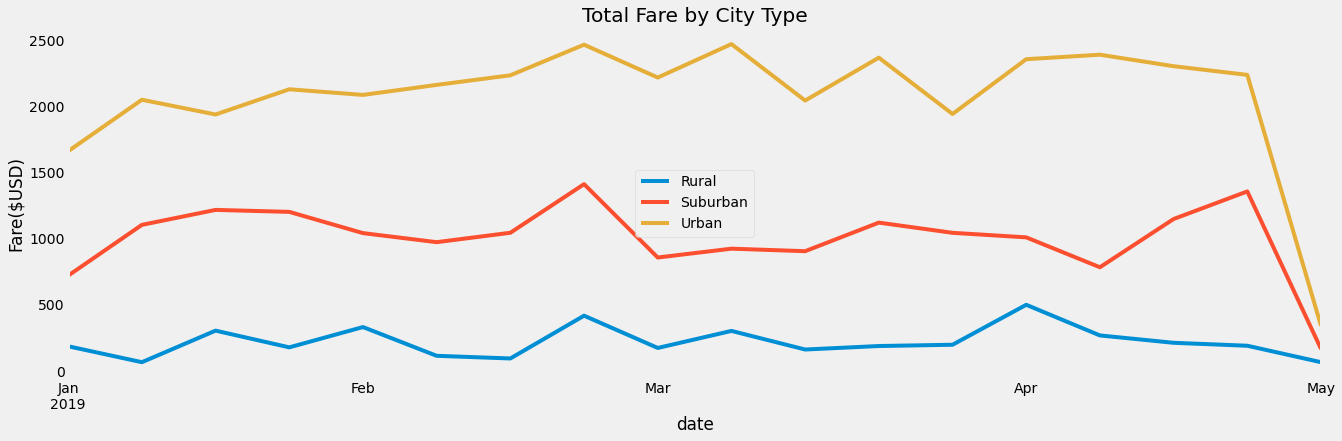

In [26]:
weekly = fares_type_date_Apr.plot(figsize=(20,6))

weekly.set_title("Total Fare by City Type")
weekly.set_ylabel("Fare($USD)")
weekly.legend()
weekly.grid()
plt.show()